<a href="https://colab.research.google.com/github/caltamiranda/TAM/blob/main/parcial_2_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# a) Naive bayes: GaussianNB


entradas:

**Prior**:

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

Donde $P(A)⇒$ Es el prior que significa la probabilidad antes de observar cada clase.

**var_smoothing**: Porción de la varianza más grande de todas las características que se agrega a las varianzas para la estabilidad del cálculo.

$\sigma^2_{\text{modificada}} = \sigma^2 + \text{var_smoothing} \cdot \max(\sigma^2)$

$P(x|C)=\frac{1}{\sqrt{2πσ^2}}exp(-\frac{(x-μ)^2}{2σ^2})$

$μ$ es la media de la característica en la clase 𝐶.

$σ$es la varianza de la característica en la clase 𝐶.

$x$ es el valor observado de la característica.

# Atributos

- **`class_count_`** : `ndarray` de forma `(n_classes,)`  
  Número de muestras de entrenamiento observadas en cada clase.

- **`class_prior_`** : `ndarray` de forma `(n_classes,)`  
  Probabilidad de cada clase.

- **`classes_`** : `ndarray` de forma `(n_classes,)`  
  Etiquetas de clase conocidas por el clasificador.

- **`epsilon_`** : `float`  
  Valor aditivo absoluto para las varianzas.

- **`n_features_in_`** : `int`  
  Número de características vistas durante `fit`.  
  ✅ *Añadido en la versión 0.24.*

- **`feature_names_in_`** : `ndarray` de forma `(n_features_in_)`  
  Nombres de las características vistas durante `fit`. Definido solo cuando `X` tiene nombres de características que son cadenas de caracteres.  
  ✅ *Añadido en la versión 1.0.*

- **`var_`** : `ndarray` de forma `(n_classes, n_features)`  
  Varianza de cada característica por clase.  
  ✅ *Añadido en la versión 1.0.*

- **`theta_`** : `ndarray` de forma `(n_classes, n_features)`  
  Media de cada característica por clase.


# Resultado y forma de la función de pérdida en Naive Bayes (Scikit-learn)

- **Resultado del modelo:**  
  El modelo de Naive Bayes de `sklearn` proporciona como resultado la probabilidad de pertenencia a cada clase para una muestra de entrada \( X \), utilizando el teorema de Bayes bajo la suposición de independencia condicional entre las características.  
  La predicción de la clase se realiza seleccionando la clase con la mayor probabilidad posterior:

  $
  \hat{y} = \underset{C_k}{\arg\max} \ P(C_k | X) = \underset{C_k}{\arg\max} \ \frac{P(X | C_k) P(C_k)}{P(X)}
  $

  Donde:

  - $ P(C_k | X) $ es la probabilidad a posteriori de la clase $( C_k $).
  - $P(X | C_k) $ es la verosimilitud de los datos dada la clase $( C_k ).$
  - $ P(C_k) $ es la probabilidad a priori de la clase $( C_k )$.
  - $ P(X) $ es la evidencia (constante de normalización).

- **Forma de la función de pérdida:**  
  En Naive Bayes, la función de pérdida utilizada durante el entrenamiento es la **verosimilitud negativa** o su versión logarítmica, que mide qué tan bien el modelo predice las etiquetas correctas dadas las características de entrada:

  $
  \mathcal{L}(\theta) = - \sum_{i=1}^{n} \log P(y_i | X_i, \theta)
  $

  Donde:

  - $ \mathcal{L}(\theta) $ es la función de pérdida log-verosimilitud negativa.
  - $ y_i $ es la clase real de la muestra $ i $.
  - $ X_i $ representa el conjunto de características de la muestra $i$.
  - $\theta $ son los parámetros estimados del modelo (medias y varianzas en el caso de Gaussiano).

  En la implementación de Scikit-learn, se minimiza esta función de pérdida al estimar los parámetros $ \theta $ utilizando la máxima verosimilitud, lo que equivale a maximizar la probabilidad de los datos observados.




# b) SGDClassifier

# Parámetros

- **`loss`** \{`'hinge'`, `'log_loss'`, `'modified_huber'`, `'squared_hinge'`, `'perceptron'`, `'squared_error'`, `'huber'`, `'epsilon_insensitive'`, `'squared_epsilon_insensitive'`\}, *default=`'hinge'`*  
  La función de pérdida a utilizar:

  - `'hinge'` da una SVM lineal. $ \max(0, 1 - y \cdot w^T x) $
  - `'log_loss'` da regresión logística, un clasificador probabilístico. $ \log(1 + e^{-y w^T x}) $
  - `'modified_huber'` es una pérdida suavizada que tolera valores atípicos y proporciona estimaciones probabilísticas.  
  - `'squared_hinge'` es similar a hinge pero penalizada cuadráticamente. $ ( \max(0, 1 - y \cdot w^T x) )^2 $
  - `'perceptron'` es la pérdida lineal usada por el algoritmo perceptrón. $ -y w^T x $

- **`penalty`** \{`'l2'`, `'l1'`, `'elasticnet'`, `None`\}, *default=`'l2'`*  
  El término de regularización a usar:

  - `'l2'` es la regularización estándar para SVM lineal. $ \frac{1}{2} \| w \|_2^2 $
  - `'l1'` introduce sparsidad. $ \| w \|_1 $
  - `'elasticnet'` combina ambas regularizaciones. $ \alpha \| w \|_1 + (1 - \alpha) \| w \|_2^2 $

- **`alpha`** *float, default=0.0001*  
  Constante que multiplica el término de regularización.  

- **`l1_ratio`** *float, default=0.15*  
  Parámetro de mezcla de Elastic Net, con $ 0 \leq l1\_ratio \leq 1 $.  

- **`fit_intercept`** *bool, default=True*  
  Si se debe estimar el intercepto o no.

- **`max_iter`** *int, default=1000*  
  Número máximo de iteraciones sobre los datos de entrenamiento.

- **`tol`** *float or None, default=1e-3*  
  Criterio de parada. La condición de convergencia se verifica con la fórmula:  
  $ \text{loss} > \text{best\_loss} - \text{tol} $

- **`shuffle`** *bool, default=True*  
  Indica si los datos deben ser reorganizados después de cada época.

- **`learning_rate`** \{`'constant'`, `'optimal'`, `'invscaling'`, `'adaptive'`\}, *default=`'optimal'`*  
  El esquema de tasa de aprendizaje:  

  - `'constant'`: $ \eta = \eta_0 $  
  - `'optimal'`: $ \eta = \frac{1}{\alpha (t + t_0)} $  
  - `'invscaling'`: $ \eta = \frac{\eta_0}{t^{\text{power\_t}}} $  
  - `'adaptive'`: $ \eta = \eta_0 $, reduciendo si la pérdida no mejora.  

- **`eta0`** *float, default=0.0*  
  Tasa de aprendizaje inicial en esquemas `'constant'`, `'invscaling'` y `'adaptive'`.

- **`power_t`** *float, default=0.5*  
  Exponente para el ajuste inverso de la tasa de aprendizaje.

- **`early_stopping`** *bool, default=False*  
  Si se debe detener el entrenamiento cuando la puntuación de validación no mejora.

- **`n_iter_no_change`** *int, default=5*  
  Número de iteraciones sin mejora antes de detener el entrenamiento.

- **`class_weight`** \{`dict`, `'balanced'`, `None`\}, *default=None*  
  Pesos predefinidos para las clases. `'balanced'` ajusta pesos automáticamente según la frecuencia de clases.

- **`warm_start`** *bool, default=False*  
  Si se reutiliza la solución previa en la siguiente ejecución de `fit`.

- **`average`** *bool or int, default=False*  
  Si se computa la media de los pesos de SGD a través de todas las actualizaciones.

# Atributos

- **`coef_`** : `ndarray` de forma `(1, n_features)` si $ n\_classes == 2 $ o `(n_classes, n_features)`.  
  Pesos asignados a las características.

- **`intercept_`** : `ndarray` de forma `(1,)` si $ n\_classes == 2 $ o `(n_classes,)`.  
  Constantes en la función de decisión.

- **`n_iter_`** : Número de iteraciones reales antes de alcanzar el criterio de parada.

- **`n_features_in_`** : Número de características vistas durante `fit`.

- **`feature_names_in_`** : Nombres de las características vistas durante `fit`.


# Resultados esperados de `SGDClassifier` en Scikit-learn

El modelo `SGDClassifier` de Scikit-learn ajusta un clasificador lineal utilizando el algoritmo de **Gradiente Descendente Estocástico (SGD)**. Una vez entrenado con un conjunto de datos $X$ y etiquetas $y$, los resultados esperados incluyen:

- **Coeficientes del modelo (`coef_`)**: Los pesos ajustados a las características de entrada $w$.
- **Intercepto (`intercept_`)**: El sesgo o término independiente del modelo.
- **Predicción (`predict`)**: Devuelve la clase más probable para cada muestra de entrada $X$, utilizando la función de decisión:

  $$
  \hat{y} = \arg\max_{k} (w_k^T X + b_k)
  $$

  Donde:

  - $w_k$ representa los coeficientes de la clase $k$,
  - $b_k$ es el término de sesgo de la clase $k$,
  - $X$ es la matriz de características de entrada.

- **Probabilidad (`predict_proba`)**: En el caso de la regresión logística con la función de pérdida `log_loss`, se puede calcular la probabilidad de cada clase utilizando la función sigmoide:

  $$
  P(y = 1 | X) = \frac{1}{1 + e^{- (w^T X + b)}}
  $$

# Función de pérdida en `SGDClassifier`

El modelo minimiza una de las siguientes funciones de pérdida, seleccionadas mediante el parámetro `loss`:

1. **Hinge Loss (para SVM lineal):**  
   $$
   L(w, x, y) = \max(0, 1 - y (w^T x + b))
   $$
   Se utiliza para clasificación de margen máximo, como en SVM.

2. **Log Loss (para regresión logística):**  
   $$
   L(w, x, y) = \log(1 + e^{-y (w^T x + b)})
   $$
   Se utiliza para clasificación probabilística.

3. **Modified Huber Loss (robusta a valores atípicos):**  
   $$
   L(w, x, y) =
   \begin{cases}
   \max(0, 1 - y (w^T x + b))^2 & \text{si } y (w^T x + b) \geq -1 \\
   -4 y (w^T x + b) & \text{en otro caso}
   \end{cases}
   $$
   Tolerante a valores atípicos y proporciona una estimación probabilística.

4. **Squared Hinge Loss:**  
   $$
   L(w, x, y) = ( \max(0, 1 - y (w^T x + b)) )^2
   $$
   Penalización cuadrática de errores de clasificación.

5. **Perceptron Loss:**  
   $$
   L(w, x, y) = -y (w^T x + b)
   $$
   Utilizada en el algoritmo del perceptrón clásico.

6. **Funciones de pérdida para regresión:**

   - **Squared Error Loss:**  
     $$
     L(w, x, y) = (y - w^T x - b)^2
     $$

   - **Huber Loss:**  
     $$
     L(w, x, y) =
     \begin{cases}
     \frac{1}{2} (y - w^T x - b)^2 & \text{si } |y - w^T x - b| \leq \delta \\
     \delta (|y - w^T x - b| - \frac{\delta}{2}) & \text{en otro caso}
     \end{cases}
     $$

   - **Epsilon-Insensitive Loss:**  
     $$
     L(w, x, y) = \max(0, |y - w^T x - b| - \epsilon)
     $$


Estas funciones de pérdida permiten optimizar el modelo dependiendo del problema de clasificación o regresión a resolver.




# c) LogisticRegression



## **Parámetros**

- **`penalty`** \{`'l1'`, `'l2'`, `'elasticnet'`, `None`\}, *default=`'l2'`*  
  Especifica la norma de la penalización:

  - `None`: No se aplica penalización.
  - `'l2'`: Se añade una penalización L2 (valor predeterminado).  
    $ \frac{1}{2} \| w \|_2^2 $
  - `'l1'`: Se añade una penalización L1.  
    $ \| w \|_1 $
  - `'elasticnet'`: Se añaden términos de penalización L1 y L2.  
    $ \alpha \| w \|_1 + (1 - \alpha) \| w \|_2^2 $

- **`dual`** *bool, default=False*  
  Formulación dual (restringida) o primal (regularizada). La formulación dual solo está implementada para la penalización L2 con el solucionador `'liblinear'`. Se recomienda `dual=False` cuando $ n_{samples} > n_{features} $.

- **`tol`** *float, default=1e-4*  
  Tolerancia para el criterio de parada.

- **`C`** *float, default=1.0*  
  Inverso de la fuerza de regularización; debe ser un número positivo. Valores más pequeños indican una regularización más fuerte.

  $$
  \min_w \left[ C \sum_{i=1}^{n} \log(1 + e^{-y_i (w^T x_i + b)}) + \| w \|_2^2 \right]
  $$

- **`fit_intercept`** *bool, default=True*  
  Especifica si se debe añadir una constante (también llamada intercepto o sesgo) a la función de decisión.

- **`intercept_scaling`** *float, default=1*  
  Útil solo cuando el solucionador `'liblinear'` se utiliza y `fit_intercept=True`.

- **`class_weight`** *dict or ‘balanced’, default=None*  
  Pesos asociados a cada clase en la forma `{class_label: weight}`. La opción `'balanced'` ajusta automáticamente los pesos de acuerdo con la frecuencia de las clases:

  $$
  \frac{n_{samples}}{n_{classes} \cdot \text{np.bincount}(y)}
  $$

- **`random_state`** *int, RandomState instance, default=None*  
  Se utiliza para barajar los datos en los solucionadores `'sag'`, `'saga'` o `'liblinear'`.

- **`solver`** \{`'lbfgs'`, `'liblinear'`, `'newton-cg'`, `'newton-cholesky'`, `'sag'`, `'saga'`\}, *default=`'lbfgs'`*  
  Algoritmo de optimización a utilizar:

  - `'liblinear'`: Buena opción para conjuntos de datos pequeños.
  - `'sag'` y `'saga'`: Más rápidos para grandes conjuntos de datos.
  - `'newton-cholesky'`: Ideal para $ n_{samples} \gg n_{features} \cdot n_{classes} $.



## **Atributos**

- **`coef_`** : `ndarray` de forma `(1, n_features)` si $ n_{classes} == 2 $, de lo contrario `(n_classes, n_features)`.  
  Representa los coeficientes de la regresión logística.

- **`intercept_`** : `ndarray` de forma `(1,)` si $ n_{classes} == 2 $, de lo contrario `(n_classes,)`.  
  Representa la constante en la función de decisión.

- **`n_iter_`** : Número de iteraciones realizadas antes de alcanzar la convergencia.

- **`classes_`** : Lista de etiquetas de clases vistas durante el ajuste.

- **`n_features_in_`** : Número de características vistas durante el entrenamiento.



Esta implementación de `LogisticRegression` permite seleccionar entre varios solucionadores, aplicando regularización para mejorar la estabilidad del modelo y evitar sobreajuste.


# Resultados esperados de LogisticRegression

El modelo de regresión logística ajusta una función de decisión lineal para clasificar datos en dos o más categorías. Los resultados esperados al entrenar el modelo con un conjunto de datos $X$ y etiquetas $y$ incluyen:

- **Coeficientes del modelo (`coef_`)**:  
  Representan los pesos ajustados a las características de entrada $w$.

- **Intercepto (`intercept_`)**:  
  Representa el sesgo o término independiente $b$ del modelo.

- **Predicción (`predict`)**:  
  Devuelve la clase más probable para cada muestra de entrada $X$, usando la función de decisión logística:

  $$
  \hat{y} = \arg\max \left( \frac{1}{1 + e^{- (w^T X + b)}} \right)
  $$

  Donde:

  - $w$ son los coeficientes del modelo.
  - $b$ es el intercepto (sesgo).
  - $X$ es la matriz de características de entrada.

- **Probabilidad (`predict_proba`)**:  
  Devuelve la probabilidad de pertenencia a cada clase, calculada con la función sigmoide en el caso binario:

  $$
  P(y = 1 | X) = \frac{1}{1 + e^{- (w^T X + b)}}
  $$

  Para problemas multiclase, se usa la función softmax:

  $$
  P(y_i = k | X) = \frac{e^{w_k^T X + b_k}}{\sum_{j=1}^{K} e^{w_j^T X + b_j}}
  $$

  Donde $K$ es el número de clases.



# Función de pérdida (Loss)

La regresión logística utiliza la **función de pérdida de entropía cruzada** (también llamada **log loss**), que mide la discrepancia entre las probabilidades predichas y las etiquetas reales:

## **Para clasificación binaria:**

La función de pérdida binaria se define como:

$$
L(w, b) = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Donde:

- $\hat{y}_i$ es la probabilidad predicha para la muestra $i$.
- $y_i$ es la etiqueta verdadera (0 o 1).
- $n$ es el número de muestras.

## **Para clasificación multiclase (softmax):**

En el caso multiclase, la pérdida se define como:

$$
L(w, b) = - \frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{ik} \log(\hat{y}_{ik})
$$

Donde:

- $K$ es el número de clases.
- $y_{ik}$ es un indicador binario de si la muestra $i$ pertenece a la clase $k$.
- $\hat{y}_{ik}$ es la probabilidad predicha para la clase $k$.



# Regularización en la función de pérdida

La regularización L1 o L2 se aplica para evitar el sobreajuste. La función de pérdida regularizada es:

$$
L(w, b) = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \lambda R(w)
$$

Donde $R(w)$ representa:

- **L1 regularización (Lasso):**  
  $ R(w) = \| w \|_1 $

- **L2 regularización (Ridge):**  
  $ R(w) = \| w \|_2^2 $

- **ElasticNet (combinación de L1 y L2):**  
  $ R(w) = \alpha \| w \|_1 + (1 - \alpha) \| w \|_2^2 $

El parámetro $C$ en Scikit-learn controla la fuerza de la regularización, donde valores más pequeños de $C$ implican una mayor regularización.



#d) LinearDiscriminantAnalysis

La clase `LinearDiscriminantAnalysis` (LDA) es un clasificador con una frontera de decisión lineal, generado ajustando densidades condicionales de clase a los datos y utilizando la regla de Bayes.  
El modelo ajusta una densidad gaussiana a cada clase, asumiendo que todas comparten la misma matriz de covarianza.  

El modelo también se puede usar para reducir la dimensionalidad del conjunto de datos, proyectándolo en las direcciones más discriminativas mediante el método `transform`.



## **Parámetros**

- **`solver`** \{`'svd'`, `'lsqr'`, `'eigen'`\}, *default=`'svd'`*  
  Método de solución utilizado:

  - `'svd'`: Descomposición en valores singulares. No calcula la matriz de covarianza, recomendado para datos con muchas características.
  - `'lsqr'`: Solución de mínimos cuadrados, permite combinaciones con reducción (`shrinkage`) o estimadores de covarianza personalizados.
  - `'eigen'`: Descomposición en valores propios, también compatible con reducción de covarianza.

- **`shrinkage`** \{`'auto'`, `float`\}, *default=None*  
  Parámetro de reducción aplicado a la estimación de la covarianza:

  - `None`: No se aplica reducción.
  - `'auto'`: Reducción automática utilizando el lema de Ledoit-Wolf.
  - `float` en el rango $ [0,1] $: Valor fijo de reducción.

  **Nota:** La reducción solo se aplica con los solucionadores `'lsqr'` y `'eigen'`.

- **`priors`** *array-like de forma `(n_classes,)`, default=None*  
  Probabilidades a priori de las clases. Si no se especifica, se infieren de los datos de entrenamiento:

  $$
  P(C_k) = \frac{\text{número de muestras en } C_k}{\text{total de muestras}}
  $$

- **`n_components`** *int, default=None*  
  Número de componentes seleccionados para reducción de dimensionalidad:

  $$
  {n_{components}} \leq \min(n_{classes} - 1, n_{features})
  $$

- **`store_covariance`** *bool, default=False*  
  Si es `True`, se calcula explícitamente la matriz de covarianza intra-clase cuando se usa el solucionador `'svd'`.

- **`tol`** *float, default=1e-4*  
  Umbral absoluto para considerar valores singulares significativos al estimar el rango de $X$. Dimensiones no significativas se descartan.

- **`covariance_estimator`** *default=None*  
  Estimador de covarianza personalizado en lugar de la estimación empírica.



## **Atributos**

- **`coef_`** : `ndarray` de forma `(n_classes, n_features)`  
  Vectores de peso ajustados a cada clase:

  $$
  w_k = \Sigma^{-1} (\mu_k - \mu)
  $$

- **`intercept_`** : `ndarray` de forma `(n_classes,)`  
  Términos de intercepto para cada clase:

  $$
  b_k = -\frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log P(C_k)
  $$

- **`covariance_`** : `array-like` de forma `(n_features, n_features)`  
  Matriz de covarianza intra-clase ponderada:

  $$
  \Sigma = \sum_{k=1}^{K} P(C_k) \Sigma_k
  $$

- **`explained_variance_ratio_`** : `ndarray` de forma `(n_components,)`  
  Proporción de varianza explicada por cada componente seleccionado.

- **`means_`** : `array-like` de forma `(n_classes, n_features)`  
  Medias de cada clase:

  $$
  \mu_k = \frac{1}{N_k} \sum_{i \in C_k} x_i
  $$

- **`priors_`** : `array-like` de forma `(n_classes,)`  
  Probabilidades a priori de las clases.

- **`scalings_`** : `array-like` de forma `(rank, n_classes - 1)`  
  Escalamiento de características en el espacio de centroides de clase.

- **`xbar_`** : `array-like` de forma `(n_features,)`  
  Media general del conjunto de datos:

  $$
  \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
  $$

- **`classes_`** : `array-like` de forma `(n_classes,)`  
  Etiquetas de clase únicas.

- **`n_features_in_`** : Número de características vistas durante el ajuste.



## **Resultados esperados**

El modelo ajusta los parámetros de discriminación lineal para cada clase y devuelve:

- **Predicción (`predict`)**:  
  Predice la clase de una muestra mediante la regla de decisión de Bayes:

  $$
  \hat{y} = \arg\max_{k} \left( x^T w_k + b_k \right)
  $$

- **Probabilidades (`predict_proba`)**:  
  Estima la probabilidad de pertenencia a cada clase usando la función softmax:

  $$
  P(C_k | x) = \frac{e^{x^T w_k + b_k}}{\sum_{j=1}^{K} e^{x^T w_j + b_j}}
  $$

- **Transformación (`transform`)**:  
  Proyecta los datos en las direcciones discriminativas:

  $$
  Z = X W
  $$



## **Función de pérdida (Loss)**

La función de pérdida utilizada en LDA está basada en la **verosimilitud gaussiana** bajo la hipótesis de igualdad de covarianza entre clases. La función de discriminación se define como:

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log P(C_k)
$$

La pérdida se basa en minimizar la tasa de error de clasificación de acuerdo con la regla de Bayes:

$$
L = \sum_{i=1}^{n} -\log P(C_k | x_i)
$$

Donde:

- $P(C_k | x_i)$ es la probabilidad condicional estimada de la clase $C_k$ dado $x_i$.
- La decisión se toma maximizando la función de discriminación $\delta_k(x)$.


Este modelo es útil tanto para clasificación como para reducción de dimensionalidad mediante la proyección en las direcciones con mayor discriminación entre clases.


# KNeighborsClassifier

La clase `KNeighborsClassifier` implementa la clasificación basada en la votación de los **k vecinos más cercanos (KNN)**.  
Este método asigna una clase a un punto de prueba en función de las clases mayoritarias de sus vecinos más cercanos en el conjunto de entrenamiento.



## **Parámetros**

- **`n_neighbors`** *int, default=5*  
  Número de vecinos a considerar para las consultas de vecinos más cercanos ($k$).  

- **`weights`** \{`'uniform'`, `'distance'`\}, callable or None, *default=`'uniform'`*  
  Función de peso utilizada en la predicción:

  - `'uniform'`: Todos los vecinos tienen el mismo peso.
  - `'distance'`: Los vecinos más cercanos tienen mayor peso, basado en la distancia:

    $$
    w_i = \frac{1}{d_i}
    $$

  - *callable*: Función definida por el usuario que recibe un array de distancias y devuelve un array de pesos.

- **`algorithm`** \{`'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`\}, *default=`'auto'`*  
  Algoritmo para calcular los vecinos más cercanos:

  - `'ball_tree'`: Usa la estructura de datos *BallTree*.
  - `'kd_tree'`: Usa la estructura de datos *KDTree*.
  - `'brute'`: Búsqueda exhaustiva.
  - `'auto'`: Escoge el mejor algoritmo según los datos.

  **Nota:** Si los datos de entrada son dispersos, se usará búsqueda por fuerza bruta, sin importar la configuración del parámetro.

- **`leaf_size`** *int, default=30*  
  Tamaño de la hoja en `BallTree` o `KDTree`, afectando la velocidad de consulta y la memoria requerida.

- **`p`** *float, default=2*  
  Parámetro de la métrica de Minkowski. La distancia calculada se define como:

  $$
  d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
  $$

  Valores comunes de $p$ incluyen:

  - $p = 1$: Distancia de Manhattan (L1).
  - $p = 2$: Distancia Euclidiana (L2).

- **`metric`** *str or callable, default=`'minkowski'`*  
  Métrica utilizada para el cálculo de distancias. Por defecto, se usa la métrica de Minkowski con $p=2$, equivalente a la distancia Euclidiana:

  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$

  También se pueden usar métricas predefinidas de `scipy.spatial.distance` o una función personalizada.

- **`metric_params`** *dict, default=None*  
  Parámetros adicionales para la función de métrica.

- **`n_jobs`** *int, default=None*  
  Número de trabajos en paralelo para la búsqueda de vecinos. `None` significa un solo núcleo, `-1` usa todos los procesadores disponibles.



## **Atributos**

- **`classes_`** : `array` de forma `(n_classes,)`  
  Etiquetas de clase conocidas por el clasificador.

- **`effective_metric_`** : `str` or callable  
  Métrica de distancia efectiva utilizada, que puede ser la especificada en el parámetro `metric` o una alternativa equivalente (por ejemplo, `'euclidean'` si `metric='minkowski'` y `p=2`).

- **`effective_metric_params_`** : `dict`  
  Parámetros adicionales efectivos para la función de métrica.

- **`n_features_in_`** : *int*  
  Número de características vistas durante el ajuste.

- **`feature_names_in_`** : `ndarray` de forma `(n_features_in_,)`  
  Nombres de las características vistas durante el ajuste.

- **`n_samples_fit_`** : *int*  
  Número de muestras en los datos ajustados.

- **`outputs_2d_`** : *bool*  
  `False` cuando la forma de `y` es `(n_samples,)` o `(n_samples,1)`, en caso contrario `True`.


## **Resultados esperados**

El modelo devuelve los siguientes resultados clave:

- **Predicción (`predict`)**:  
  Predice la clase más común entre los $k$ vecinos más cercanos mediante votación mayoritaria:

  $$
  \hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k} \mathbb{1}(y_i = c)
  $$

  Donde:

  - $\mathcal{N}_k$ representa el conjunto de vecinos más cercanos.
  - $\mathbb{1}(\cdot)$ es la función indicadora.

- **Probabilidades (`predict_proba`)**:  
  Devuelve la probabilidad de pertenencia a cada clase, calculada como la proporción de vecinos de cada clase:

  $$
  P(C_k | x) = \frac{\sum_{i \in \mathcal{N}_k} \mathbb{1}(y_i = C_k)}{k}
  $$



## **Función de pérdida (Loss)**

El clasificador de vecinos más cercanos no utiliza una función de pérdida explícita basada en optimización, pero la precisión de las predicciones puede ser evaluada utilizando métricas como la **precisión**, **recall** y la **exactitud** (accuracy).  

En términos generales, la precisión se define como:

$$
\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de muestras}}
$$

Para evaluar el modelo, se utiliza la **distancia mínima** entre puntos, definida como:

$$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

Donde:

- Para $p = 1$, se obtiene la distancia Manhattan.
- Para $p = 2$, se obtiene la distancia Euclidiana.

# Función de pérdida en `KNeighborsClassifier`

El clasificador **K-Nearest Neighbors (KNN)** en Scikit-learn **no utiliza una función de pérdida explícita**, ya que no ajusta un modelo paramétrico a los datos durante el entrenamiento.  
En lugar de minimizar una función de costo, KNN realiza la clasificación en función de la **distancia a los vecinos más cercanos**, utilizando votación de mayoría o ponderación por distancia.

A pesar de esto, la calidad del modelo se puede evaluar mediante métricas como la **precisión** o la **tasa de error**, que actúan como una medida de rendimiento post-entrenamiento.

---

## **1. Pérdida basada en precisión (Accuracy Loss)**

La métrica más utilizada para evaluar el rendimiento del clasificador KNN es la **precisión**, que mide el porcentaje de predicciones correctas sobre el total de muestras:

$$
\text{Accuracy} = \frac{\sum_{i=1}^{n} \mathbb{1}(\hat{y}_i = y_i)}{n}
$$

Donde:

- $ \hat{y}_i $ es la predicción para la muestra $ i $.
- $ y_i $ es la etiqueta real de la muestra $ i $.
- $ \mathbb{1}(\cdot) $ es la función indicadora que devuelve 1 si la predicción es correcta y 0 en caso contrario.
- $ n $ es el número total de muestras.

El objetivo es maximizar la precisión, minimizando así la tasa de error:

$$
\text{Error} = 1 - \text{Accuracy}
$$

---

## **2. Función de pérdida basada en la distancia**

En KNN, las decisiones se toman basadas en la distancia entre los puntos de datos. La métrica de distancia utilizada es un factor importante en la clasificación, y la más comúnmente empleada es la **distancia de Minkowski**, definida como:

$$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

Casos especiales de la distancia de Minkowski incluyen:

- **Distancia Manhattan (L1 norm):**  
  $$
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  $$

- **Distancia Euclidiana (L2 norm):**  
  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$

Para $ p = 1 $, se obtiene la distancia Manhattan, y para $ p = 2 $, se obtiene la distancia Euclidiana.

---

## **3. Pérdida por votación de vecinos**

La clasificación en KNN se basa en la votación de los $ k $ vecinos más cercanos. La clase predicha se determina por la mayoría de votos:

$$
\hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k} \mathbb{1}(y_i = c)
$$

Donde:

- $ \mathcal{N}_k $ representa el conjunto de vecinos más cercanos.
- La función indicadora $ \mathbb{1}(\cdot) $ devuelve 1 si el vecino pertenece a la clase $ c $, y 0 en caso contrario.

Si se utiliza ponderación por distancia, la predicción se ajusta según la influencia de los vecinos más cercanos:

$$
\hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k} \frac{\mathbb{1}(y_i = c)}{d(x, x_i)}
$$


Dado que KNN es un clasificador basado en distancia y votación, su desempeño se evalúa en términos de:

- **Precisión (accuracy)** para minimizar la tasa de error.
- **Distancia entre puntos** para mejorar la clasificación.
- **Votación mayoritaria** para asignar etiquetas de clase.

Estas métricas ayudan a evaluar la efectividad del modelo sin requerir una función de pérdida explícita en el entrenamiento.


# SVC

La clase `SVC` (Support Vector Classification) implementa la clasificación mediante **Máquinas de Vectores de Soporte (SVM)** basada en la librería **LibSVM**.  
El tiempo de ajuste del modelo escala de manera cuadrática con el número de muestras, por lo que para conjuntos de datos grandes se recomienda el uso de `LinearSVC` o `SGDClassifier`.

El soporte para múltiples clases se maneja mediante un esquema **uno-contra-uno (OvO)**.



## **Parámetros**

- **`C`** *float, default=1.0*  
  Parámetro de regularización que controla el equilibrio entre el margen de la clasificación y los errores de clasificación:

  $$
  \min \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{n} \xi_i
  $$

  Donde:

  - $ C $ es el parámetro de regularización.
  - $ \xi_i $ es la variable de holgura para permitir errores en los márgenes.

  Un valor más alto de $ C $ busca minimizar los errores de clasificación pero puede llevar al sobreajuste.

- **`kernel`** \{`'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'`\}, *default=`'rbf'`*  
  Especifica el tipo de núcleo a usar en el algoritmo:

  - `'linear'`: $ K(x, x') = x^T x' $
  - `'poly'`: $ K(x, x') = (\gamma x^T x' + r)^d $
  - `'rbf'`: $ K(x, x') = \exp(-\gamma \| x - x' \|^2) $
  - `'sigmoid'`: $ K(x, x') = \tanh(\gamma x^T x' + r) $
  - `'precomputed'`: Se utiliza una matriz de kernel precomputada.

- **`degree`** *int, default=3*  
  Grado del polinomio para el núcleo `'poly'`. Se ignora para otros tipos de núcleo.

- **`gamma`** \{`'scale'`, `'auto'`\} o *float, default=`'scale'`*  
  Coeficiente del núcleo para `'rbf'`, `'poly'` y `'sigmoid'`:

  - `'scale'`: $ \frac{1}{{n_{features}} \cdot X.\text{var}()} $
  - `'auto'`: $ \frac{1}{n_{features}} $

- **`coef0`** *float, default=0.0*  
  Término independiente en las funciones de núcleo `'poly'` y `'sigmoid'`.

- **`shrinking`** *bool, default=True*  
  Si se debe usar la heurística de encogimiento para acelerar la optimización.

- **`probability`** *bool, default=False*  
  Si se deben habilitar estimaciones de probabilidad. Esto requiere validación cruzada interna.

- **`tol`** *float, default=1e-3*  
  Tolerancia para el criterio de parada del algoritmo de optimización.

- **`cache_size`** *float, default=200*  
  Tamaño de la memoria caché en MB para el almacenamiento de la matriz de kernel.

- **`class_weight`** *dict o ‘balanced’, default=None*  
  Ajusta el parámetro $ C $ de cada clase en función de sus proporciones en el conjunto de datos:

  $$
  {class_{weight}}[i] = \frac{{n_{samples}}}{{n_{classes}} \cdot \text{np.bincount}(y)}
  $$

- **`decision_function_shape`** \{`'ovo'`, `'ovr'`\}, *default=`'ovr'`*  
  Esquema de clasificación multiclase:

  - `'ovo'` (uno contra uno)  
  - `'ovr'` (uno contra el resto)



## **Atributos**

- **`class_weight_`** : `ndarray` de forma `(n_classes,)`  
  Multiplicadores del parámetro $ C $ para cada clase.

- **`classes_`** : `ndarray` de forma `(n_classes,)`  
  Etiquetas de clase conocidas.

- **`coef_`** : `ndarray` de forma `(n_classes * (n_classes - 1) / 2, n_features)`  
  Pesos asignados a las características cuando se usa el núcleo lineal.

- **`dual_coef_`** : `ndarray` de forma `(n_classes - 1, n_SV)`  
  Coeficientes duales de los vectores de soporte.

- **`intercept_`** : `ndarray` de forma `(n_classes * (n_classes - 1) / 2,)`  
  Constantes en la función de decisión.

- **`support_`** : `ndarray` de forma `(n_SV,)`  
  Índices de los vectores de soporte.

- **`support_vectors_`** : `ndarray` de forma `(n_SV, n_features)`  
  Vectores de soporte del modelo.

- **`n_support_`** : `ndarray` de forma `(n_classes,)`  
  Número de vectores de soporte por clase.


## **Resultados esperados**

- **Predicción (`predict`)**  
  Predice la clase más probable mediante la función de decisión:

  $$
  \hat{y} = \text{sign} \left( \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b \right)
  $$

- **Probabilidades (`predict_proba`)**  
  Si se habilita, devuelve probabilidades mediante la calibración de Platt:

  $$
  P(y=1 | x) = \frac{1}{1 + \exp(-A f(x) + B)}
  $$

  Donde $ f(x) $ es la función de decisión y $ A $ y $ B $ son parámetros ajustados.


## **Función de pérdida (Loss)**

La función de pérdida utilizada en SVM es la **Hinge Loss**, que penaliza las muestras mal clasificadas o aquellas dentro del margen:

$$
L(w, b) = C \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b)) + \frac{1}{2} \| w \|^2
$$

Donde:

- $ C $ controla la penalización de errores.
- $ y_i \in \{-1, 1\} $ son las etiquetas de las muestras.
- $ x_i $ son los vectores de entrada.
- $ w $ son los pesos del modelo.

Para la clasificación multiclase, la pérdida se extiende usando el esquema **uno contra uno (OvO)** o **uno contra el resto (OvR)**.



# Función de pérdida

El modelo **Support Vector Classification (SVC)** utiliza la **pérdida Hinge**, que penaliza las muestras mal clasificadas y aquellas que caen dentro del margen de clasificación.  
La función de pérdida Hinge está definida como:

$$
L(w, b) = C \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b)) + \frac{1}{2} \| w \|^2
$$

Donde:

- $ C $ es el parámetro de regularización que controla el equilibrio entre la complejidad del modelo y los errores de clasificación.
- $ y_i \in \{-1, 1\} $ son las etiquetas de las muestras.
- $ x_i $ son los vectores de características de entrada.
- $ w $ representa los pesos del modelo.
- $ b $ es el término de sesgo (intercepto).



## **Interpretación de la función de pérdida**

La función de pérdida se compone de dos términos:

1. **Término de margen suave:**  
   $$ \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b)) $$
   - Penaliza las muestras que se encuentran dentro del margen o están mal clasificadas.
   - Si una muestra está correctamente clasificada y fuera del margen, la pérdida es cero.
   - Si una muestra está dentro del margen o mal clasificada, se incurre en una penalización proporcional.

2. **Término de regularización:**  
   $$ \frac{1}{2} \| w \|^2 $$
   - Controla la complejidad del modelo, prefiriendo márgenes más amplios para mejorar la generalización.
   - Un menor valor de $ C $ promueve un margen más amplio, mientras que un mayor valor de $ C $ intenta minimizar los errores de clasificación.



## **Extensión a la clasificación multiclase**

Para problemas multiclase, la función de pérdida se adapta usando los siguientes enfoques:

1. **One-vs-One (OvO):**  
   Se entrena un clasificador para cada par de clases, y la clase con más votos se predice:

   $$
   L_{ovo}(w, b) = \sum_{i=1}^{n} \sum_{j=1}^{n} \max(0, 1 - y_{ij} (w^T x + b))
   $$

2. **One-vs-Rest (OvR):**  
   Se entrena un clasificador para cada clase contra todas las demás:

   $$
   L_{ovr}(w, b) = \sum_{k=1}^{K} \sum_{i=1}^{n} \max(0, 1 - y_{ik} (w^T x + b))
   $$



## **Relación con la función de decisión**

El modelo toma decisiones en función de la siguiente expresión:

$$
f(x) = w^T x + b
$$

Si $ f(x) \geq 1 $, la muestra se clasifica correctamente con un margen seguro.  
Si $ 0 < f(x) < 1 $, la muestra está dentro del margen y se incurre en una penalización.  
Si $ f(x) \leq 0 $, la muestra está mal clasificada y contribuye a la pérdida.


- Maximiza el margen entre clases.
- Penaliza las muestras dentro del margen.
- Controla la complejidad del modelo mediante el parámetro de regularización $ C $.


# RandomForestClassifier

El clasificador **Random Forest** es un estimador de conjuntos que ajusta varios árboles de decisión sobre diferentes submuestras del conjunto de datos y utiliza la media para mejorar la precisión de predicción y controlar el sobreajuste.  

Cada árbol del bosque selecciona la mejor estrategia de división, equivalente a usar `splitter="best"` en un `DecisionTreeClassifier`.


## **Parámetros**

- **`n_estimators`** *int, default=100*  
  Número de árboles en el bosque.

  $$
  \hat{f}(x) = \frac{1}{n_{trees}} \sum_{i=1}^{n_{trees}} f_i(x)
  $$

- **`criterion`** \{`"gini"`, `"entropy"`, `"log_loss"`\}, *default=`"gini"`*  
  Función para medir la calidad de una división:

  - **Gini impurity:**  
    $$
    G = 1 - \sum_{i=1}^{n_{classes}} p_i^2
    $$

  - **Entropía (Shannon Information Gain):**  
    $$
    H = -\sum_{i=1}^{n_{classes}} p_i \log(p_i)
    $$

- **`max_depth`** *int, default=None*  
  Profundidad máxima del árbol. Si es `None`, se expanden los nodos hasta que todas las hojas sean puras o tengan menos de `min_samples_split` muestras.

- **`min_samples_split`** *int or float, default=2*  
  Número mínimo de muestras necesarias para dividir un nodo interno:

  - Si es `int`: mínimo número de muestras.
  - Si es `float`: proporción respecto al total de muestras, calculado como:

    $$
    \lceil \text{min_samples_split} \times n_{samples} \rceil
    $$

- **`min_samples_leaf`** *int or float, default=1*  
  Número mínimo de muestras necesarias para estar en una hoja:

  $$
  \lceil \text{min_samples_leaf} \times n_{samples} \rceil
  $$

- **`max_features`** \{`"sqrt"`, `"log2"`, `None`\}, int or float, default=`"sqrt"`  
  Número de características a considerar en cada división:

  - `"sqrt"`: $ \sqrt{n_{features}} $
  - `"log2"`: $ \log_2(n_{features}) $
  - `None`: usa todas las características.

- **`bootstrap`** *bool, default=True*  
  Indica si se usan muestras de bootstrap para construir cada árbol.  
  Si es `False`, se utiliza todo el conjunto de datos.

- **`oob_score`** *bool, default=False*  
  Si es `True`, se usa la muestra fuera de bolsa (*out-of-bag*) para estimar el error de generalización.

- **`random_state`** *int, default=None*  
  Controla la aleatoriedad del proceso de bootstrap y la selección de características.

## **Atributos**

- **`estimators_`** : Lista de árboles de decisión individuales en el bosque.

- **`feature_importances_`** : Importancia de las características basada en la reducción de impureza:

  $$
  I(f_j) = \sum_{t=1}^{n_{nodes}} \frac{N_t}{N} (\text{impurity}_t - \text{impurity}_{split})
  $$

- **`oob_score_`** : Precisión estimada basada en la muestra fuera de bolsa.

- **`classes_`** : Etiquetas de clase vistas durante el ajuste.

- **`n_features_in_`** : Número de características vistas durante el ajuste.



## **Resultados esperados**

El modelo devuelve los siguientes resultados clave:

- **Predicción (`predict`)**  
  Asigna la clase más frecuente entre los árboles del bosque:

  $$
  \hat{y} = \arg\max_{c} \sum_{i=1}^{n_{trees}} \mathbb{1}(h_i(x) = c)
  $$

- **Probabilidades (`predict_proba`)**  
  Devuelve la probabilidad promedio de cada clase entre todos los árboles:

  $$
  P(y = c | x) = \frac{1}{n_{trees}} \sum_{i=1}^{n_{trees}} P_i(y = c | x)
  $$



## **Función de pérdida (Loss)**

En Random Forest, no hay una función de pérdida explícita utilizada durante el entrenamiento como en los métodos de optimización tradicionales.  
En su lugar, se mide la **impureza** de los nodos utilizando los siguientes criterios:

1. **Criterio de Gini (predeterminado):**

   $$
   G = 1 - \sum_{i=1}^{n_{classes}} p_i^2
   $$

   Donde:

   - $ p_i $ es la proporción de muestras de la clase $ i $ en el nodo.

2. **Criterio de Entropía:**

   $$
   H = -\sum_{i=1}^{n_{classes}} p_i \log(p_i)
   $$

   Donde:

   - La entropía mide la pureza del nodo, valores más bajos indican nodos más homogéneos.



## **Evaluación del modelo**

Para evaluar el modelo, se pueden utilizar métricas como:

- **Precisión (Accuracy):**  
  $$
  \text{Accuracy} = \frac{\text{número de predicciones correctas}}{n_{samples}}
  $$

- **Tasa de error:**  
  $$
  \text{Error} = 1 - \text{Accuracy}
  $$

- **Matriz de confusión:**  
  Representa el número de aciertos y errores por clase.



- Reducción de la varianza mediante el promedio de múltiples árboles.
- Mejor capacidad de generalización en comparación con un solo árbol de decisión.
- Facilidad de interpretación a través de la importancia de características.

# Función de pérdida en `RandomForestClassifier`

El modelo **Random Forest** no utiliza una función de pérdida explícita como en otros algoritmos de aprendizaje supervisado basados en optimización.  
En su lugar, minimiza la **impureza** en cada nodo del árbol de decisión, utilizando criterios como **Gini** o **Entropía**, que sirven como métricas de división para evaluar la calidad de los nodos.


## **1. Criterio de Gini (Impureza de Gini)**

El criterio de Gini mide la pureza de un nodo. Se define como:

$$
G = 1 - \sum_{i=1}^{n_{classes}} p_i^2
$$

Donde:

- $ p_i $ es la proporción de muestras de la clase $ i $ en el nodo actual.
- Un valor de Gini de 0 indica que todas las muestras en el nodo pertenecen a una sola clase (pureza total).
- Un valor más alto indica una mezcla de clases (mayor impureza).

La reducción de impureza en la división de un nodo se calcula como:

$$
\Delta G = G_{\text{padre}} - \left( \frac{N_{\text{izq}}}{N_{\text{total}}} G_{\text{izq}} + \frac{N_{\text{der}}}{N_{\text{total}}} G_{\text{der}} \right)
$$

Donde:

- $ G_{\text{padre}} $ es la impureza antes de la división.
- $ G_{\text{izq}}, G_{\text{der}} $ son las impurezas de los nodos hijos.
- $ N_{\text{izq}}, N_{\text{der}}, N_{\text{total}} $ representan el número de muestras en los nodos izquierdo, derecho y total, respectivamente.


## **2. Criterio de Entropía (Información de Shannon)**

La entropía mide la incertidumbre de las etiquetas de clase en un nodo:

$$
H = -\sum_{i=1}^{n_{classes}} p_i \log(p_i)
$$

Donde:

- $ p_i $ es la proporción de muestras de la clase $ i $ en el nodo.
- La entropía toma un valor de 0 si el nodo es puro (todas las muestras pertenecen a la misma clase).
- Valores más altos indican una mayor incertidumbre.

La reducción de entropía para evaluar la calidad de una división se calcula como:

$$
\Delta H = H_{\text{padre}} - \left( \frac{N_{\text{izq}}}{N_{\text{total}}} H_{\text{izq}} + \frac{N_{\text{der}}}{N_{\text{total}}} H_{\text{der}} \right)
$$



## **3. Minimización de la Impureza Ponderada**

El modelo Random Forest selecciona la mejor división en función de la **reducción de impureza ponderada**, dada por:

$$
\frac{N_{\text{nodo}}}{N_{\text{total}}} \left( \text{impureza}_{\text{nodo}} - \frac{N_{\text{izq}}}{N_{\text{nodo}}} \text{impureza}_{\text{izq}} - \frac{N_{\text{der}}}{N_{\text{nodo}}} \text{impureza}_{\text{der}} \right)
$$

Este criterio garantiza que las divisiones seleccionadas minimicen la impureza en el conjunto de datos de entrenamiento.


## **4. Pérdida en Clasificación y Evaluación del Modelo**

Para evaluar el rendimiento del modelo, se utilizan métricas comunes como la **precisión** y la **tasa de error**, calculadas como:

- **Precisión (Accuracy):**  
  $$
  \text{Accuracy} = \frac{\text{Número de predicciones correctas}}{n_{samples}}
  $$

- **Tasa de error:**  
  $$
  \text{Error} = 1 - \text{Accuracy}
  $$


1. **Minimización de la impureza del nodo**, utilizando criterios como:
   - Gini (para medir la probabilidad de clasificación incorrecta).
   - Entropía (para medir la incertidumbre de la clasificación).

2. **Promedio de múltiples árboles** para reducir la varianza y mejorar la generalización.

3. **Evaluación basada en métricas** como la precisión y la tasa de error para validar el rendimiento del modelo.


# `GaussianProcessClassifier` en Scikit-learn

El clasificador **Gaussian Process Classifier (GPC)** implementa la clasificación basada en procesos Gaussianos, utilizando la **aproximación de Laplace** para ajustar una función de verosimilitud no Gaussiana.



## **Parámetros**

- **`kernel`** *kernel instance, default=None*  
  Función de covarianza del proceso Gaussiano. Si se deja como `None`, se utiliza el kernel predeterminado:

  $$
  k(x, x') = 1.0 \cdot \exp\left(-\frac{\|x - x'\|^2}{2 \cdot l^2}\right)
  $$

  Donde $ l $ es el parámetro de longitud de escala.

- **`optimizer`** \{`'fmin_l_bfgs_b'`, callable, None\}, *default=`'fmin_l_bfgs_b'`*  
  Método para optimizar los hiperparámetros del kernel utilizando la **verosimilitud marginal logarítmica**, resolviendo:

  $$
  \hat{\theta} = \arg\max_{\theta} \log p(y | X, \theta)
  $$

- **`n_restarts_optimizer`** *int, default=0*  
  Número de reinicios del optimizador para encontrar los mejores hiperparámetros del kernel.

- **`max_iter_predict`** *int, default=100*  
  Número máximo de iteraciones en el método de Newton para aproximar la posterior durante la predicción.

- **`warm_start`** *bool, default=False*  
  Si es `True`, reutiliza la solución de la última iteración para acelerar la convergencia.

- **`copy_X_train`** *bool, default=True*  
  Si es `True`, almacena una copia persistente de los datos de entrenamiento.

- **`random_state`** *int or None, default=None*  
  Controla la generación de números aleatorios para garantizar resultados reproducibles.

- **`multi_class`** \{`'one_vs_rest'`, `'one_vs_one'`\}, *default=`'one_vs_rest'`*  
  Especifica la estrategia para clasificación multiclase:

  - `'one_vs_rest'`: Se ajusta un clasificador binario por cada clase.
  - `'one_vs_one'`: Se ajusta un clasificador por cada par de clases.

- **`n_jobs`** *int, default=None*  
  Número de trabajos paralelos a ejecutar para problemas multiclase.



## **Atributos**

- **`kernel_`** : *kernel instance*  
  Devuelve el kernel utilizado por el modelo después del ajuste.

- **`log_marginal_likelihood_value_`** : *float*  
  Valor de la verosimilitud marginal logarítmica después del ajuste del modelo.

- **`classes_`** : *array-like de forma `(n_{classes},)`*  
  Etiquetas únicas de las clases.

- **`n_classes_`** : *int*  
  Número de clases en los datos de entrenamiento.

- **`n_features_in_`** : *int*  
  Número de características vistas durante el ajuste.



## **Cálculos utilizados en el modelo**

El modelo de clasificación mediante procesos Gaussianos se basa en los siguientes principios:

1. **Función de verosimilitud condicional:**  
   Se modela la probabilidad de la clase utilizando una función sigmoide:

   $$
   p(y_i | f_i) = \frac{1}{1 + \exp(-y_i f_i)}
   $$

2. **Distribución previa del proceso Gaussiano:**  
   Se asume una distribución normal sobre los valores latentes:

   $$
   p(f | X, \theta) = \mathcal{N}(0, K(X, X | \theta))
   $$

   Donde $ K(X, X | \theta) $ es la matriz de covarianza del kernel.

3. **Aproximación de Laplace:**  
   Dado que la posterior no es Gaussiana, se aproxima con una Gaussiana ajustada en la moda de la distribución posterior:

   $$
   \hat{f} = \arg\max_f \log p(y | f) + \log p(f | X, \theta)
   $$

   La actualización de la aproximación se realiza mediante el método de Newton-Raphson:

   $$
   f^{(t+1)} = f^{(t)} - \left( \nabla^2 L(f) \right)^{-1} \nabla L(f)
   $$

4. **Predicción:**  
   La predicción de una nueva instancia se realiza evaluando la probabilidad condicional:

   $$
   P(y = 1 | X_*) \approx \int \sigma(f_*) \mathcal{N}(f_* | \mu_*, \sigma_*^2) \, df_*
   $$

   Donde $ \mu_* $ y $ \sigma_*^2 $ son la media y varianza predichas.

5. **Maximización de la verosimilitud marginal:**  
   Para encontrar los hiperparámetros óptimos del kernel, se maximiza la verosimilitud marginal:

   $$
   \log p(y | X, \theta) \approx -\frac{1}{2} f^T K^{-1} f - \frac{1}{2} \log |K| - \sum_{i=1}^{n_{samples}} \log \sigma(y_i f_i)
   $$


# Función de pérdida en `GaussianProcessClassifier`

El clasificador **Gaussian Process Classification (GPC)** modela la distribución de las clases mediante un **proceso Gaussiano**, utilizando la **aproximación de Laplace** para ajustar una función de verosimilitud no Gaussiana.

La función de pérdida que se optimiza en `GaussianProcessClassifier` se basa en la **verosimilitud logarítmica marginal negativa**, definida como:

$$
L(\theta) = - \log p(y | X, \theta) = - \log \int p(y | f) p(f | X, \theta) \, df
$$

Donde:

- $ \theta $ representa los hiperparámetros del kernel.
- $ p(y | f) $ es la función de verosimilitud condicional (modelo logístico).
- $ p(f | X, \theta) $ es la distribución previa del proceso Gaussiano.
- $ f $ son los valores latentes del modelo.


## **1. Verosimilitud condicional**

El modelo de clasificación asume que las probabilidades de clase están modeladas mediante una **función sigmoide**, dada por:

$$
p(y_i | f_i) = \frac{1}{1 + \exp(-y_i f_i)}
$$

Donde:

- $ y_i \in \{-1, 1\} $ representa la clase de la muestra $ i $.
- $ f_i $ es la función latente evaluada en el punto $ x_i $.

La función de pérdida en este caso es la **pérdida logarítmica negativa**, también conocida como pérdida de entropía cruzada:

$$
L(y, f) = - \sum_{i=1}^{n_{samples}} \left( y_i \log(\sigma(f_i)) + (1 - y_i) \log(1 - \sigma(f_i)) \right)
$$

Donde:

- $ \sigma(f_i) $ es la función sigmoide:  
  $$
  \sigma(f_i) = \frac{1}{1 + \exp(-f_i)}
  $$



## **2. Priori Gaussiana y aproximación de Laplace**

El proceso Gaussiano asume que la distribución de los valores latentes sigue una distribución normal:

$$
p(f | X, \theta) = \mathcal{N}(0, K(X, X | \theta))
$$

Donde:

- $ K(X, X | \theta) $ es la matriz de covarianza del kernel definida por los hiperparámetros $ \theta $.

Debido a la no-linealidad de la función sigmoide, la posterior $ p(f | X, y, \theta) $ no es Gaussiana, por lo que se emplea la **aproximación de Laplace**, que ajusta una distribución Gaussiana a la moda de la distribución posterior.

La aproximación de Laplace implica resolver el problema de optimización para encontrar la moda de la distribución posterior:

$$
\hat{f} = \arg\max_f \log p(y | f) + \log p(f | X, \theta)
$$

Esto se resuelve mediante el método de **Newton-Raphson**, con la función de actualización iterativa:

$$
f^{(t+1)} = f^{(t)} - \left( \nabla^2 L(f) \right)^{-1} \nabla L(f)
$$



## **3. Maximización de la verosimilitud marginal**

El modelo ajusta los hiperparámetros $ \theta $ del kernel maximizando la **verosimilitud marginal logarítmica**:

$$
\log p(y | X, \theta) \approx -\frac{1}{2} f^T K^{-1} f - \frac{1}{2} \log |K| - \sum_{i=1}^{n_{samples}} \log \sigma(y_i f_i)
$$

Donde:

- $ K $ es la matriz de covarianza del kernel.
- La optimización se realiza mediante el algoritmo **L-BFGS-B**, que encuentra los hiperparámetros óptimos.



## **4. Evaluación de la pérdida en la predicción**

Durante la predicción, se aproximan las probabilidades de clase mediante la distribución posterior del proceso Gaussiano utilizando la función sigmoide:

$$
p(y = 1 | X_*) \approx \int \sigma(f_*) \mathcal{N}(f_* | \mu_*, \sigma_*^2) \, df_*
$$

Donde:

- $ \mu_* $ y $ \sigma_*^2 $ son la media y varianza predichas para la nueva entrada $ X_* $.

En la práctica, esta integral se aproxima usando métodos como la **aproximación de Laplace** o la **aproximación de cuadratura Gaussiana**.



1. **Pérdida de entropía cruzada**, que mide la discrepancia entre las probabilidades predichas y las etiquetas reales.
2. **Verosimilitud marginal negativa**, utilizada para optimizar los hiperparámetros del kernel mediante el método de Laplace.
3. **Optimización numérica**, que ajusta los parámetros mediante el algoritmo L-BFGS-B.

El objetivo es encontrar un equilibrio entre la complejidad del modelo y la capacidad de generalización, maximizando la verosimilitud marginal mientras se mantiene la regularización a través de los hiperparámetros del kernel.


In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.1 MB/s eta 0:00:00


In [2]:
# Librerías del sistema
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap  # Si no lo tienes instalado: !pip install umap-learn

# Conjuntos de datos
from sklearn.datasets import fetch_lfw_people

# División de datos y validación cruzada
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

# Modelos de clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Evaluación de modelos
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
    make_scorer,
    f1_score
)
from sklearn.utils.multiclass import unique_labels

# Pipeline de modelos
from sklearn.pipeline import Pipeline

# Guardado y carga de modelos
import joblib

# Otros
from itertools import cycle

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Crear carpeta de resultados si no existe
if not os.path.exists('results'):
    os.mkdir('results')
else:
    print("Carpeta 'results' ya existe")


In [3]:


#%%  guardar figuras
def save_fig(path_img,fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, fig_id + "." + fig_extension)
    print("Guardando...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path)

import seaborn as sns

#curvas roc multiclase
def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):
    lw = 2
    # Falsos positivos
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # roc
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) #interpolar para suavizar
    # promediado sobre numero de clases
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # graficar
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))
    plt.show()


#matriz confusión = #[[TN FP][FN TP]]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


# ROC curve and ROC
def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular micro-average ROC curve y ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes

def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    gráfica la matriz de confusión con y sin normalización
    """
    if not title:
        title = 'Matriz de confusión'

    # calcular matriz de confusión
    cm = 100*confusion_matrix(y_true, y_pred,normalize="true")
    # se identifican las etiquetas en los datos
    classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # mostrar ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta original',
           xlabel='Predicción')

    # Rotar ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # textos.
    fmt = '.1f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Dimensiones tipo pandas:  (1288, 1850)
Dimensiones tipo imágen: (1288, 50, 37)


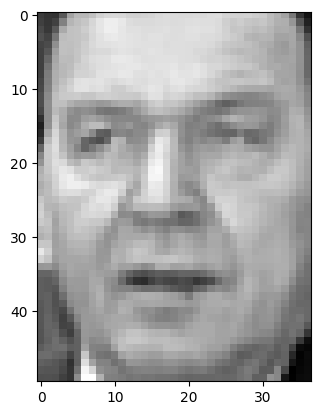

In [4]:
#Lectura base de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# datos tipo pandas
Xdata = pd.DataFrame(lfw_people.data)/255
y = lfw_people.target
print('Dimensiones tipo pandas: ',Xdata.shape)
print('Dimensiones tipo imágen:',lfw_people.images.shape)
plt.imshow(np.array(Xdata.iloc[300,:]).reshape(lfw_people.images.shape[1],
                                             lfw_people.images.shape[2]),cmap='gray')
plt.show()

In [5]:
#Particion entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata,y,test_size=0.3, random_state=123)
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
510,0.000836,0.001143,0.001446,0.001666,0.001897,0.001994,0.002066,0.002071,0.002097,0.002138,...,0.000549,0.001384,0.002332,0.003189,0.003645,0.003727,0.003101,0.000856,0.000395,0.000466
1035,0.001589,0.001758,0.001922,0.002409,0.002819,0.002958,0.002917,0.002830,0.002830,0.002737,...,0.000297,0.000374,0.000384,0.000436,0.000359,0.000369,0.000420,0.000497,0.000466,0.000466
176,0.000892,0.001205,0.001210,0.001287,0.001492,0.001687,0.001763,0.001779,0.001845,0.001866,...,0.000451,0.000446,0.000482,0.000472,0.000477,0.000466,0.000513,0.000559,0.000600,0.000538
620,0.000267,0.000584,0.001446,0.002230,0.002507,0.002512,0.002491,0.002532,0.002584,0.002594,...,0.001333,0.001389,0.000723,0.000133,0.000190,0.000251,0.000313,0.000400,0.000549,0.000666
689,0.002261,0.002409,0.001958,0.001753,0.002127,0.002907,0.002932,0.002676,0.002655,0.002799,...,0.001569,0.001512,0.001548,0.001615,0.001794,0.002276,0.003106,0.003522,0.003573,0.003578


In [6]:


# Definir los pipelines con normalización y clasificadores
steps = [
    [('nor', MinMaxScaler()), ('cla', GaussianNB())],  # Naive Bayes
    [('nor', MinMaxScaler()), ('cla', SGDClassifier(max_iter=1000, tol=1e-3))],  # SGDClassifier
    [('nor', MinMaxScaler()), ('cla', LogisticRegression(max_iter=1000))],  # Logistic Regression
    [('nor', MinMaxScaler()), ('cla', LinearDiscriminantAnalysis())],  # Linear Discriminant Analysis
    [('nor', MinMaxScaler()), ('cla', KNeighborsClassifier())],  # K-Nearest Neighbors
    [('nor', MinMaxScaler()), ('cla', SVC(kernel='rbf'))],  # SVC con kernel RBF
    [('nor', MinMaxScaler()), ('cla', RandomForestClassifier())],  # Random Forest
    [('nor', MinMaxScaler()), ('cla', GaussianProcessClassifier(kernel=1.0 * RBF(1.0)))]  # Gaussian Process
]

# Definir los hiperparámetros para GridSearchCV
parameters = [
    {},  # Naive Bayes no necesita hiperparámetros
    {'cla__alpha': [1e-2, 1, 1e2]},  # SGDClassifier (reducido)
    {'cla__C': [1e-2, 1, 1e2]},  # Logistic Regression (reducido)
    {'cla__solver': ['svd', 'lsqr']},  # LDA (menos opciones)
    {'cla__n_neighbors': [3, 5], 'cla__weights': ['uniform']},  # KNN (menos valores)
    {'cla__C': [1, 10], 'cla__gamma': [1e-2, 1]},  # SVC (reducido)
    {'cla__n_estimators': [50, 100], 'cla__max_depth': [None, 10]},  # Random Forest (menos combinaciones)
    {'cla__max_iter_predict': [50], 'cla__n_restarts_optimizer': [0]}  # Gaussian Process (menos combinaciones)
]


# Definir los nombres de los modelos
label_models = [
    'MinMax_GaussianNB', 'MinMax_SGD', 'MinMax_Logistic', 'MinMax_LDA',
    'MinMax_KNN', 'MinMax_SVC', 'MinMax_RandomForest', 'MinMax_GaussianProcess'
]

# Definir la métrica de evaluación personalizada (accuracy y f1-score)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Lista para almacenar los modelos
models = []
filename = 'results/lfw_models'

# Entrenamiento de los modelos con GridSearchCV
for i in range(len(steps)):
    print(f'Modelo {i+1}/{len(steps)}: {label_models[i]}')

    grid_search = GridSearchCV(
        Pipeline(steps[i]),
        parameters[i],
        n_jobs=-1,
        cv=5,
        scoring=scoring,
        refit='accuracy',  # Se elige 'accuracy' como métrica principal para seleccionar el mejor modelo
        verbose=10
    )

    grid_search.fit(Xtrain, ytrain)

    # Guardar el mejor modelo entrenado
    models.append(grid_search)
    joblib.dump(grid_search, f"{filename}_{label_models[i]}.pkl")

print("Entrenamiento completado y modelos guardados.")


Modelo 1/8: MinMax_GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Modelo 2/8: MinMax_SGD
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Modelo 3/8: MinMax_Logistic
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Modelo 4/8: MinMax_LDA
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Modelo 5/8: MinMax_KNN
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Modelo 6/8: MinMax_SVC
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Modelo 7/8: MinMax_RandomForest
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Modelo 8/8: MinMax_GaussianProcess
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Entrenamiento completado y modelos guardados.


In [7]:
# Cargar un modelo guardado
model = joblib.load('results/lfw_models_MinMax_SVC.pkl')

# Predecir en el conjunto de prueba
y_pred = model.predict(Xtest)

# Evaluar el modelo
acc = accuracy_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred, average='weighted')

print(f'Accuracy: {acc:.4f}, F1-score: {f1:.4f}')


Accuracy: 0.8656, F1-score: 0.8619


In [8]:
for i, model in enumerate(models):
    print(f"Modelo: {label_models[i]}")

    # best_score_ corresponde a la métrica definida en 'refit' (en tu caso: 'accuracy')
    print("Mejor score (accuracy):", model.best_score_)

    # Para ver los mejores hiperparámetros
    print("Mejores hiperparámetros:", model.best_params_)
    print("-"*60)


Modelo: MinMax_GaussianNB
Mejor score (accuracy): 0.3762492326580724
Mejores hiperparámetros: {}
------------------------------------------------------------
Modelo: MinMax_SGD
Mejor score (accuracy): 0.7191467157765501
Mejores hiperparámetros: {'cla__alpha': 0.01}
------------------------------------------------------------
Modelo: MinMax_Logistic
Mejor score (accuracy): 0.8157397176181705
Mejores hiperparámetros: {'cla__C': 1}
------------------------------------------------------------
Modelo: MinMax_LDA
Mejor score (accuracy): 0.7069551872314304
Mejores hiperparámetros: {'cla__solver': 'svd'}
------------------------------------------------------------
Modelo: MinMax_KNN
Mejor score (accuracy): 0.5538489871086556
Mejores hiperparámetros: {'cla__n_neighbors': 5, 'cla__weights': 'uniform'}
------------------------------------------------------------
Modelo: MinMax_SVC
Mejor score (accuracy): 0.8002148557397175
Mejores hiperparámetros: {'cla__C': 10, 'cla__gamma': 0.01}
--------------

In [ ]:
!pip install umap-learn


Dimensiones (DataFrame): (1288, 1850)
Dimensiones (Imagen):    (1288, 50, 37)
Tamaño de Xtrain: (901, 1850)
Tamaño de Xtest:  (387, 1850)
Shape de PCA 2D: (1288, 2)
Varianza explicada por cada componente: [0.20562972 0.13948902]


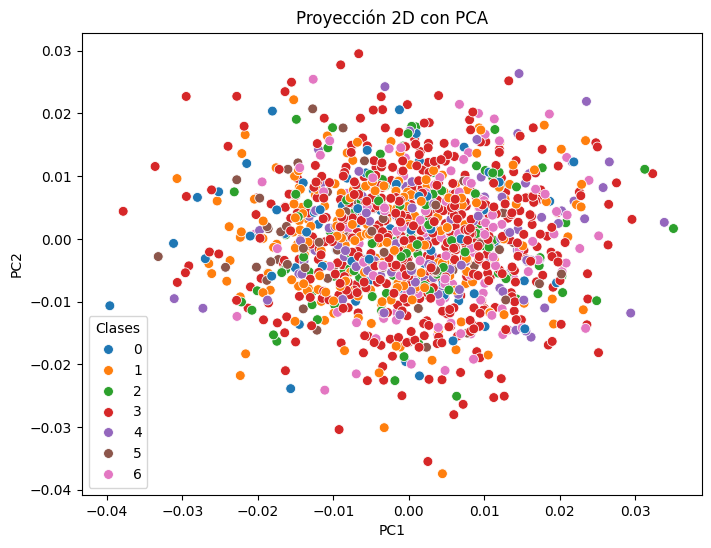

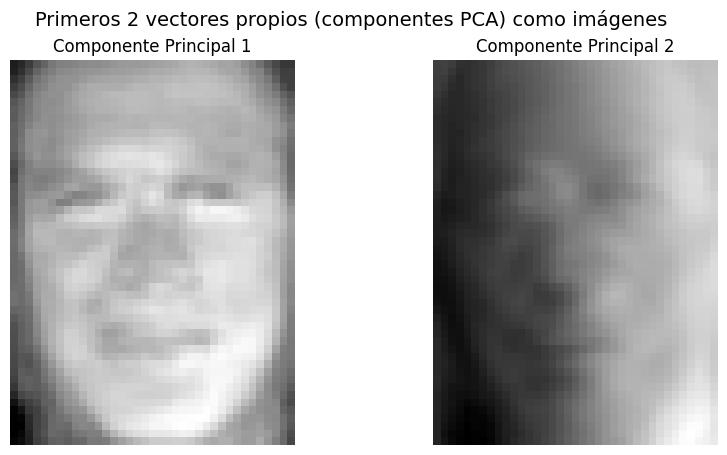

Shape de UMAP 2D: (1288, 2)


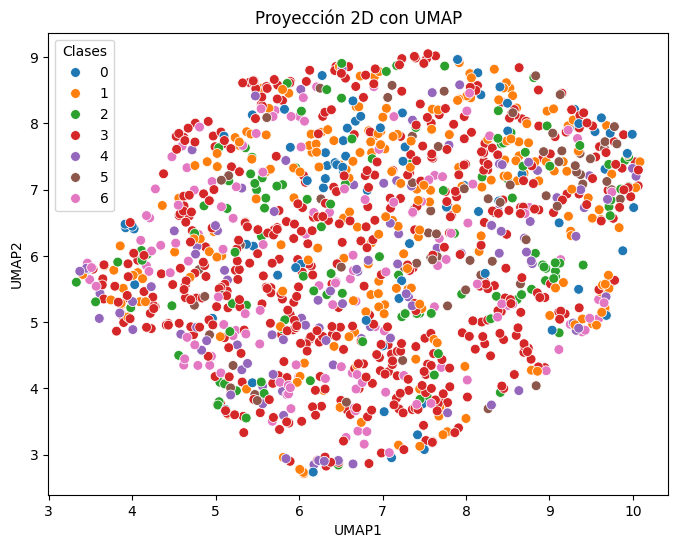

In [11]:
# ----------------------------------------------------------
# 1. Importaciones y configuración
# ----------------------------------------------------------


# ----------------------------------------------------------
# 2. Cargar y preparar el dataset LFW
# ----------------------------------------------------------
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
Xdata = pd.DataFrame(lfw_people.data)/255  # Normalización simple dividiendo por 255
y = lfw_people.target
print('Dimensiones (DataFrame):', Xdata.shape)
print('Dimensiones (Imagen):   ', lfw_people.images.shape)

# Partición de datos (70% train, 30% test)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, y,
                                                test_size=0.3,
                                                random_state=123)
print("Tamaño de Xtrain:", Xtrain.shape)
print("Tamaño de Xtest: ", Xtest.shape)

# ----------------------------------------------------------
# 3. PCA con 2 componentes
# ----------------------------------------------------------
pca = PCA(n_components=2)
# Ajustamos PCA a TODOS los datos (Xdata) o solo a Xtrain,
# depende de lo que se quiera visualizar:
Xpca = pca.fit_transform(Xdata)

print("Shape de PCA 2D:", Xpca.shape)
print("Varianza explicada por cada componente:",
      pca.explained_variance_ratio_)

# ----------------------------------------------------------
# 3.1 Graficar la proyección PCA en 2D
# ----------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1],
                hue=y, palette='tab10',
                legend='full', s=50)
plt.title("Proyección 2D con PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clases")
plt.show()

# ----------------------------------------------------------
# 3.2 Visualizar los dos primeros componentes como "imágenes"
# ----------------------------------------------------------
# Cada componente en PCA.components_ está en el espacio original de pixeles;
# por lo tanto, podemos "re-darle" forma a la del tamaño (h, w) de las imágenes
h, w = lfw_people.images.shape[1], lfw_people.images.shape[2]

component_1 = pca.components_[0].reshape(h, w)
component_2 = pca.components_[1].reshape(h, w)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(component_1, cmap='gray')
axs[0].set_title("Componente Principal 1")
axs[0].axis("off")

axs[1].imshow(component_2, cmap='gray')
axs[1].set_title("Componente Principal 2")
axs[1].axis("off")

plt.suptitle("Primeros 2 vectores propios (componentes PCA) como imágenes", fontsize=14)
plt.show()

# ----------------------------------------------------------
# 4. UMAP con 2 componentes
# ----------------------------------------------------------
# Par metros típicos de UMAP, se pueden ajustar (n_neighbors, min_dist, etc.)
reducer = umap.UMAP(n_neighbors=14, min_dist=0.1, n_components=2, random_state=42)
Xumap = reducer.fit_transform(Xdata)
print("Shape de UMAP 2D:", Xumap.shape)

# ----------------------------------------------------------
# 4.1 Graficar la proyección UMAP en 2D
# ----------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=Xumap[:, 0], y=Xumap[:, 1],
                hue=y, palette='tab10',
                legend='full', s=50)
plt.title("Proyección 2D con UMAP")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Clases")
plt.show()
